In [12]:
!pip install pydub scipy numpy

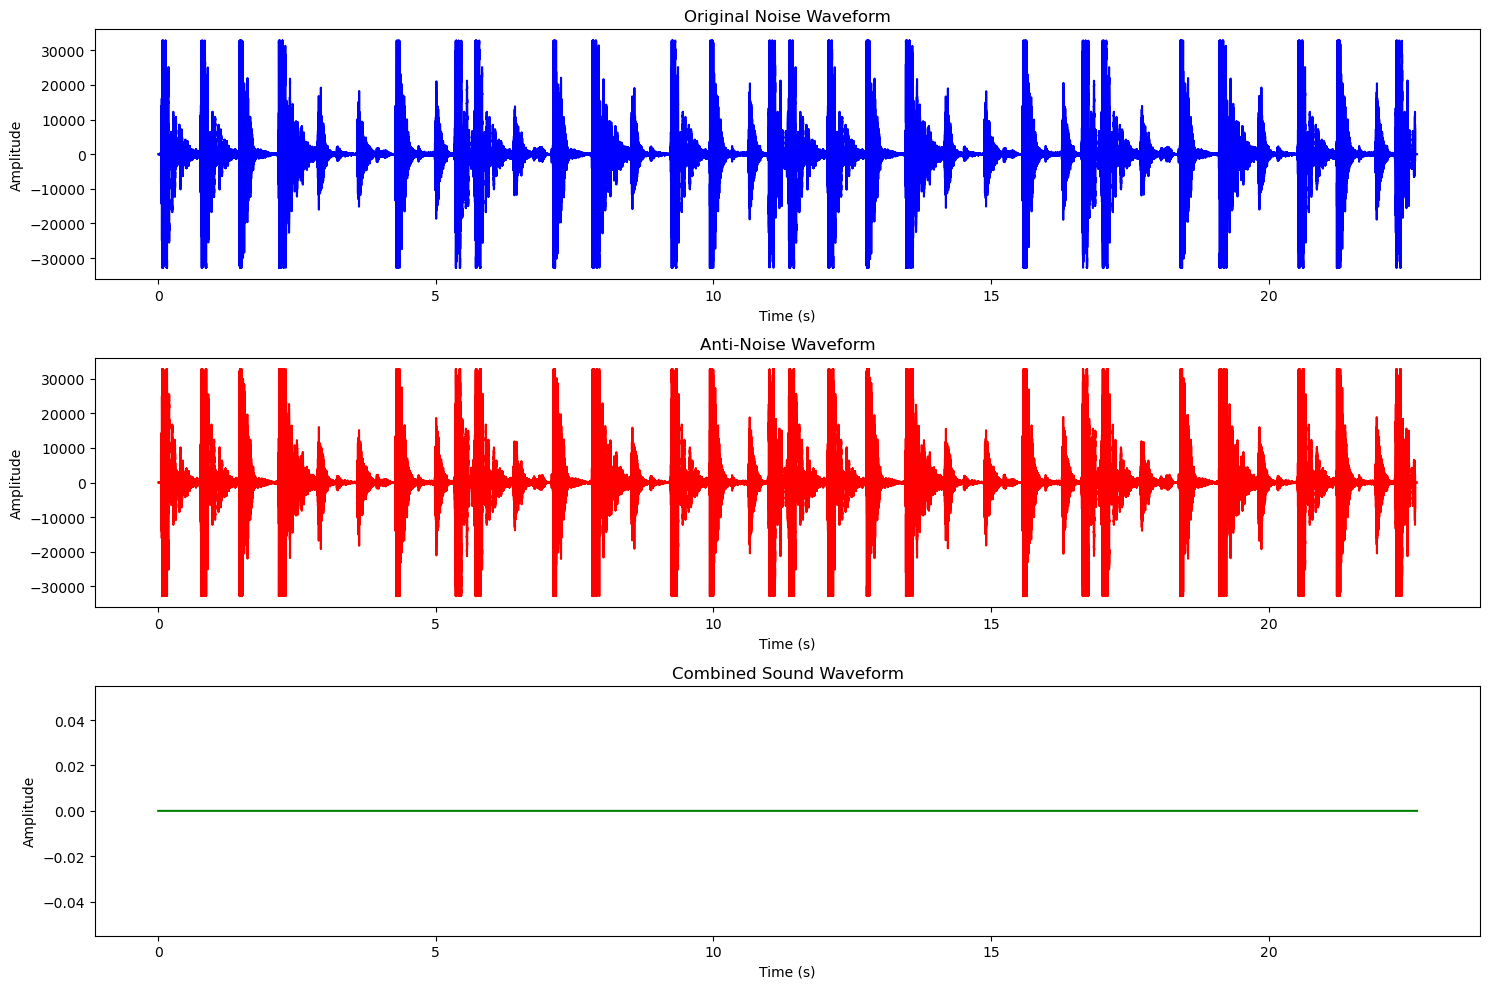

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from pydub import AudioSegment
from pydub.playback import play

audio = AudioSegment.from_file("drums.mp3")

# Convert to numpy array
samples = np.array(audio.get_array_of_samples())
sample_rate = audio.frame_rate

# Invert the waveform to create anti-sound
anti_samples = -samples

# Combine the original sound and anti-noise
combined_samples = samples + anti_samples

# Convert numpy arrays back to AudioSegment
anti_audio = AudioSegment(
    anti_samples.tobytes(),
    frame_rate=sample_rate,
    sample_width=audio.sample_width,
    channels=audio.channels
)

combined_audio = AudioSegment(
    combined_samples.tobytes(),
    frame_rate=sample_rate,
    sample_width=audio.sample_width,
    channels=audio.channels
)

# Save as MP3 files
anti_audio.export("anti_drums.mp3", format="mp3")
combined_audio.export("combined_sound.mp3", format="mp3")

# Plot the waveforms
time = np.arange(len(samples)) / sample_rate

plt.figure(figsize=(15, 10))

# Original noise plot
plt.subplot(3, 1, 1)
plt.plot(time, samples, color='b')
plt.title("Original Noise Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Anti-noise plot
plt.subplot(3, 1, 2)
plt.plot(time, anti_samples, color='r')
plt.title("Anti-Noise Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Combined sound plot
plt.subplot(3, 1, 3)
plt.plot(time, combined_samples, color='g')
plt.title("Combined Sound Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()